In [192]:
#imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
import shap
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Import train_test_split function
import json
%matplotlib inline
#plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('src/ObesityDataSet_raw_and_data_sinthetic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [210]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,2111.0,0.505921,0.500083,0.0,0.000000,1.000000,1.000000,1.0
Age,2111.0,24.312600,6.345968,14.0,19.947192,22.777890,26.000000,61.0
family_history_with_overweight,2111.0,0.817622,0.386247,0.0,1.000000,1.000000,1.000000,1.0
FAVC,2111.0,0.883941,0.320371,0.0,1.000000,1.000000,1.000000,1.0
FCVC,2111.0,2.419043,0.533927,1.0,2.000000,2.385502,3.000000,3.0
NCP,2111.0,2.685628,0.778039,1.0,2.658738,3.000000,3.000000,4.0
CAEC,2111.0,1.859308,0.468543,0.0,2.000000,2.000000,2.000000,3.0
SMOKE,2111.0,0.020843,0.142893,0.0,0.000000,0.000000,0.000000,1.0
CH2O,2111.0,2.008011,0.612953,1.0,1.584812,2.000000,2.477420,3.0
SCC,2111.0,0.045476,0.208395,0.0,0.000000,0.000000,0.000000,1.0


In [3]:
# height and weight highly correlated to BMI (target based)
data = data.drop(columns=['Height', 'Weight'])

In [4]:
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
columns = ["Gender", "family_history_with_overweight", "FAVC", 
           "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
for col in columns:
    data[col] = data[col].astype('category')
    
data_enc = data.copy()

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

category = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC',
           'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
encoder_list = []
for c in category:
    encoder = LabelEncoder()
    data_enc[c] = encoder.fit_transform(data_enc[c])
    encoder_list.append(encoder)
    
# for i in range(len(encoder_list)):
#     cat = category[i]
#     encoder = encoder_list[i]
#     data_enc[cat] = encoder.inverse_transform(data_enc[cat])
data_enc

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [7]:
X, y = data_enc.iloc[:,:-1], data_enc.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=1) 

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score', accuracy)

Accuracy score 0.7446808510638298


In [10]:
y_test_inv = encoder_list[-1].inverse_transform(y_test)
y_pred_inv = encoder_list[-1].inverse_transform(y_pred)
print(classification_report(y_test_inv,y_pred_inv))

                     precision    recall  f1-score   support

Insufficient_Weight       0.80      0.84      0.82        61
      Normal_Weight       0.49      0.60      0.54        45
     Obesity_Type_I       0.81      0.68      0.74        79
    Obesity_Type_II       0.89      0.87      0.88        54
   Obesity_Type_III       0.98      0.98      0.98        63
 Overweight_Level_I       0.66      0.54      0.59        61
Overweight_Level_II       0.58      0.68      0.63        60

           accuracy                           0.74       423
          macro avg       0.74      0.74      0.74       423
       weighted avg       0.75      0.74      0.75       423



In [33]:
type(y_test)

pandas.core.series.Series

In [32]:
for i in range(len(y_pred)):
    result = False
    if y_test.iloc[i] ==  y_pred[i]:
        result = True
    print(i, result, y_test.iloc[i], y_pred[i], y_pred_inv[i])

0 True 0 0 Insufficient_Weight
1 False 1 2 Obesity_Type_I
2 False 5 0 Insufficient_Weight
3 True 4 4 Obesity_Type_III
4 True 3 3 Obesity_Type_II
5 True 4 4 Obesity_Type_III
6 False 2 5 Overweight_Level_I
7 True 4 4 Obesity_Type_III
8 False 2 6 Overweight_Level_II
9 True 2 2 Obesity_Type_I
10 False 1 5 Overweight_Level_I
11 True 3 3 Obesity_Type_II
12 False 2 5 Overweight_Level_I
13 False 2 1 Normal_Weight
14 True 5 5 Overweight_Level_I
15 True 2 2 Obesity_Type_I
16 False 5 1 Normal_Weight
17 True 3 3 Obesity_Type_II
18 False 0 1 Normal_Weight
19 True 6 6 Overweight_Level_II
20 False 2 5 Overweight_Level_I
21 True 2 2 Obesity_Type_I
22 False 6 1 Normal_Weight
23 False 2 3 Obesity_Type_II
24 True 2 2 Obesity_Type_I
25 False 2 6 Overweight_Level_II
26 False 2 5 Overweight_Level_I
27 True 5 5 Overweight_Level_I
28 True 6 6 Overweight_Level_II
29 True 3 3 Obesity_Type_II
30 True 2 2 Obesity_Type_I
31 True 4 4 Obesity_Type_III
32 True 6 6 Overweight_Level_II
33 False 5 6 Overweight_Level_II


In [212]:
y_pred = model.predict(X)
for i in range(len(y)):
    print(i, y.iloc[i], y_pred[i], data.iloc[i,-1])

0 1 1 Normal_Weight
1 1 1 Normal_Weight
2 1 1 Normal_Weight
3 5 5 Overweight_Level_I
4 6 6 Overweight_Level_II
5 1 1 Normal_Weight
6 1 1 Normal_Weight
7 1 1 Normal_Weight
8 1 6 Normal_Weight
9 1 1 Normal_Weight
10 2 2 Obesity_Type_I
11 6 1 Overweight_Level_II
12 1 1 Normal_Weight
13 2 2 Obesity_Type_I
14 1 1 Normal_Weight
15 1 1 Normal_Weight
16 6 6 Overweight_Level_II
17 2 2 Obesity_Type_I
18 6 6 Overweight_Level_II
19 5 5 Overweight_Level_I
20 6 6 Overweight_Level_II
21 2 2 Obesity_Type_I
22 1 1 Normal_Weight
23 2 2 Obesity_Type_I
24 1 1 Normal_Weight
25 1 1 Normal_Weight
26 1 1 Normal_Weight
27 1 1 Normal_Weight
28 1 1 Normal_Weight
29 1 1 Normal_Weight
30 5 5 Overweight_Level_I
31 6 6 Overweight_Level_II
32 1 1 Normal_Weight
33 6 6 Overweight_Level_II
34 1 1 Normal_Weight
35 6 6 Overweight_Level_II
36 1 1 Normal_Weight
37 1 1 Normal_Weight
38 1 1 Normal_Weight
39 6 6 Overweight_Level_II
40 5 1 Overweight_Level_I
41 1 1 Normal_Weight
42 1 1 Normal_Weight
43 1 1 Normal_Weight
44 1 1 

603 0 0 Insufficient_Weight
604 0 0 Insufficient_Weight
605 0 0 Insufficient_Weight
606 0 0 Insufficient_Weight
607 0 0 Insufficient_Weight
608 0 0 Insufficient_Weight
609 0 0 Insufficient_Weight
610 0 0 Insufficient_Weight
611 0 0 Insufficient_Weight
612 0 0 Insufficient_Weight
613 0 0 Insufficient_Weight
614 0 0 Insufficient_Weight
615 0 0 Insufficient_Weight
616 0 0 Insufficient_Weight
617 0 0 Insufficient_Weight
618 0 0 Insufficient_Weight
619 0 0 Insufficient_Weight
620 0 0 Insufficient_Weight
621 0 0 Insufficient_Weight
622 0 0 Insufficient_Weight
623 0 1 Insufficient_Weight
624 0 0 Insufficient_Weight
625 0 0 Insufficient_Weight
626 0 0 Insufficient_Weight
627 0 0 Insufficient_Weight
628 0 0 Insufficient_Weight
629 0 0 Insufficient_Weight
630 0 0 Insufficient_Weight
631 0 0 Insufficient_Weight
632 0 0 Insufficient_Weight
633 0 0 Insufficient_Weight
634 0 0 Insufficient_Weight
635 0 0 Insufficient_Weight
636 0 0 Insufficient_Weight
637 0 0 Insufficient_Weight
638 0 0 Insufficient

1228 2 5 Obesity_Type_I
1229 2 2 Obesity_Type_I
1230 2 2 Obesity_Type_I
1231 2 2 Obesity_Type_I
1232 2 2 Obesity_Type_I
1233 2 2 Obesity_Type_I
1234 2 6 Obesity_Type_I
1235 2 2 Obesity_Type_I
1236 2 2 Obesity_Type_I
1237 2 2 Obesity_Type_I
1238 2 2 Obesity_Type_I
1239 2 2 Obesity_Type_I
1240 2 2 Obesity_Type_I
1241 2 2 Obesity_Type_I
1242 2 2 Obesity_Type_I
1243 2 2 Obesity_Type_I
1244 2 2 Obesity_Type_I
1245 2 2 Obesity_Type_I
1246 2 2 Obesity_Type_I
1247 2 2 Obesity_Type_I
1248 2 5 Obesity_Type_I
1249 2 2 Obesity_Type_I
1250 2 6 Obesity_Type_I
1251 2 2 Obesity_Type_I
1252 2 2 Obesity_Type_I
1253 2 2 Obesity_Type_I
1254 2 2 Obesity_Type_I
1255 2 2 Obesity_Type_I
1256 2 2 Obesity_Type_I
1257 2 2 Obesity_Type_I
1258 2 2 Obesity_Type_I
1259 2 1 Obesity_Type_I
1260 2 2 Obesity_Type_I
1261 2 2 Obesity_Type_I
1262 2 2 Obesity_Type_I
1263 2 2 Obesity_Type_I
1264 2 2 Obesity_Type_I
1265 2 2 Obesity_Type_I
1266 2 2 Obesity_Type_I
1267 2 2 Obesity_Type_I
1268 2 2 Obesity_Type_I
1269 2 2 Obesity

1852 4 4 Obesity_Type_III
1853 4 4 Obesity_Type_III
1854 4 4 Obesity_Type_III
1855 4 4 Obesity_Type_III
1856 4 4 Obesity_Type_III
1857 4 4 Obesity_Type_III
1858 4 4 Obesity_Type_III
1859 4 4 Obesity_Type_III
1860 4 4 Obesity_Type_III
1861 4 4 Obesity_Type_III
1862 4 4 Obesity_Type_III
1863 4 4 Obesity_Type_III
1864 4 4 Obesity_Type_III
1865 4 4 Obesity_Type_III
1866 4 4 Obesity_Type_III
1867 4 4 Obesity_Type_III
1868 4 4 Obesity_Type_III
1869 4 4 Obesity_Type_III
1870 4 4 Obesity_Type_III
1871 4 4 Obesity_Type_III
1872 4 4 Obesity_Type_III
1873 4 4 Obesity_Type_III
1874 4 4 Obesity_Type_III
1875 4 4 Obesity_Type_III
1876 4 4 Obesity_Type_III
1877 4 4 Obesity_Type_III
1878 4 4 Obesity_Type_III
1879 4 4 Obesity_Type_III
1880 4 4 Obesity_Type_III
1881 4 4 Obesity_Type_III
1882 4 4 Obesity_Type_III
1883 4 4 Obesity_Type_III
1884 4 4 Obesity_Type_III
1885 4 4 Obesity_Type_III
1886 4 4 Obesity_Type_III
1887 4 4 Obesity_Type_III
1888 4 4 Obesity_Type_III
1889 4 4 Obesity_Type_III
1890 4 4 Obe

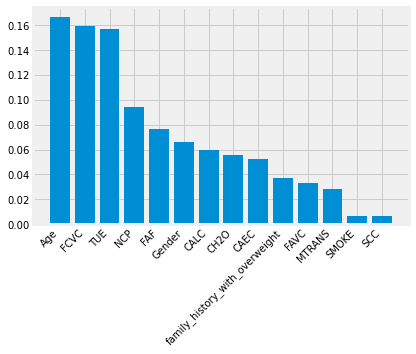

In [108]:
# Gets the gini importance
feature_imp = pd.Series(model.feature_importances_, 
                        index=X.columns).sort_values(ascending=False)
plt.bar(feature_imp.index, feature_imp)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [14]:
feature_imp

Age                               0.166493
FCVC                              0.159434
TUE                               0.156736
NCP                               0.094593
FAF                               0.076171
Gender                            0.066380
CALC                              0.060055
CH2O                              0.055929
CAEC                              0.052561
family_history_with_overweight    0.036912
FAVC                              0.033436
MTRANS                            0.028003
SMOKE                             0.006697
SCC                               0.006602
dtype: float64

In [16]:
model.feature_importances_

array([0.0663797 , 0.16649281, 0.03691188, 0.03343617, 0.15943447,
       0.09459287, 0.05256055, 0.00669679, 0.05592887, 0.00660208,
       0.07617071, 0.15673578, 0.06005475, 0.02800257])

In [203]:
data.iloc[:,-1]

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: category
Categories (7, object): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

# Use confusion matrix
Used to analyze target predictions

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


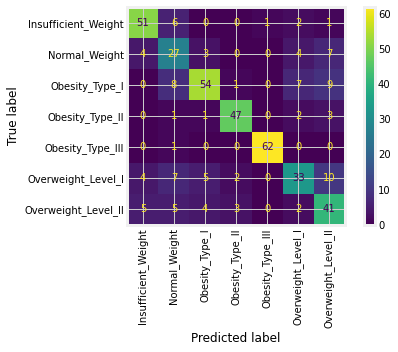

In [207]:
class_names = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 
               'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
disp = plot_confusion_matrix(model, X_test, y_test, display_labels=class_names, 
                             xticks_rotation='vertical')

# Graphviz

In [219]:
import graphviz
from sklearn.tree import export_graphviz

In [222]:
!conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / ^C
failed

CondaError: KeyboardInterrupt



In [226]:
dot_data = export_graphviz(model, out_file=True, filled=True, rounded=True, special_characters=True)
#graph = graphviz.Source(dot_data)
#graph
dot_data

AttributeError: 'bool' object has no attribute 'write'

# SHAP

In [23]:
explainer = shap.TreeExplainer(model, X)
shap_values = explainer(X)

## Local scope

In [160]:
#!pip install dataframe_image

     |████████████████████████████████| 574 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 7.3 MB/s eta 0:00:01


In [165]:
import dataframe_image as dfi
sample= 5
demo = data.iloc[sample:sample+1,:].iloc[:,:-1]
demo = demo.append(X.iloc[sample:sample+1,:])
for i in range(np.shape(shap_values)[2]):
    shap_val = pd.DataFrame(shap_values[sample,:,i].values).T
    shap_val.columns = demo.columns
    demo = demo.append(shap_val)
    print('done')
index = pd.Index(['No Encoding',
                 'Encoded',
                 'Insufficient_Weight',
                 'Normal_Weight',
                 'Obesity_Type_I',
                 'Obesity_Type_II',
                 'Obesity_Type_III',
                 'Overweight_Level_I',
                 'Overweight_Level_II'])
demo = demo.set_index(index)
demo['Predicted'] = [None, None, 0,1,0,0,0,0,0]
demo = demo.rename(columns={'family_history_with_overweight': 'family_hist...'})
# save as imgage
#dfi.export(demo, "dst_shap.png")
demo

done
done
done
done
done
done
done


objc[90984]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffa586b2318) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/100.0.4896.88/Libraries/libGLESv2.dylib (0x11236cf48). One of the two will be used. Which one is undefined.
[0418/204916.023612:INFO:headless_shell.cc(659)] Written to file /var/folders/75/5mh9hp1s1xn2ypzg82bcvlnr0000gn/T/tmpebo4wq5t/temp.png.


,Gender,Age,family_hist...,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Predicted
No Encoding,Male,29.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,NaN
Encoded,1,29.000000,0,1,2.000000,3.000000,2,0,2.000000,0,0.000000,0.000000,2,0,NaN
Insufficient_Weight,0.0195,-0.111833,0.049333,0.002,-0.044667,-0.017667,-0.005833,0.0025,0.002833,0.002833,0.001000,-0.022000,-0.001,0.023,0.0
Normal_Weight,0.123619,-0.026869,0.357821,0.023369,0.225607,0.012536,0.002619,-0.000833,0.024262,0.008429,-0.005988,0.159821,-0.000405,-0.013988,1.0
Obesity_Type_I,-0.010341,-0.015306,-0.04471,0.003726,-0.015417,-0.006103,0.002516,-0.001667,-0.027234,-0.0025,0.007373,0.007468,-0.005972,-0.001833,0.0
Obesity_Type_II,0.092369,0.042464,-0.036536,0.0,-0.187036,0.016298,-0.0005,0.0,-0.022536,0.0,0.004798,-0.012833,-0.002726,-0.023762,0.0
Obesity_Type_III,-0.074167,0.004167,0.0,0.000833,-0.076667,0.000000,0.0025,0.0,0.000000,0.0,0.000000,-0.076667,0.0,0.0,0.0
Overweight_Level_I,-0.179123,0.076246,-0.009921,0.000905,-0.024964,0.013353,-0.003206,0.0,-0.009861,-0.008667,-0.007575,-0.048718,0.014925,0.016607,0.0
Overweight_Level_II,0.028143,0.031131,-0.315988,-0.030833,0.123143,-0.018417,0.001905,0.0,0.032536,-0.000095,0.000393,-0.007071,-0.004821,-0.000024,0.0


In [143]:
np.shape(shap_values)

(2111, 14, 7)

In [162]:
data.iloc[sample:sample+1,:]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
5,Male,29.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight


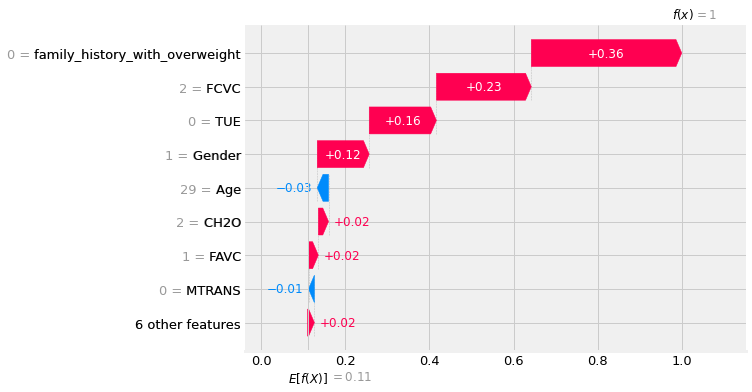

In [182]:
shap.initjs()
shap.plots.waterfall(shap_values[sample,:,1], max_display=9)

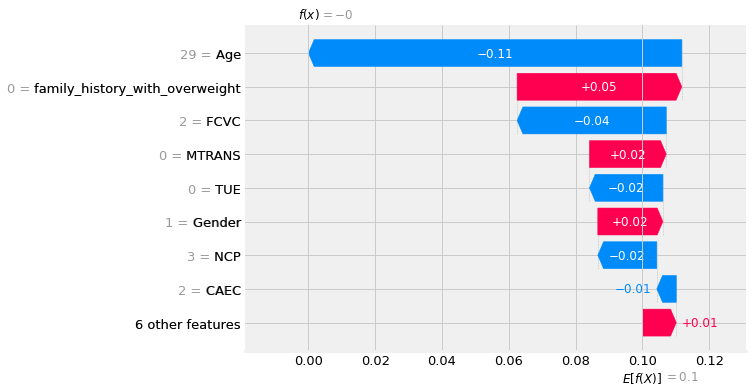

In [184]:
shap.plots.waterfall(shap_values[sample,:,0], max_display=9)

In [191]:
np.histogram(y)

(array([272, 287,   0, 351,   0, 297, 324,   0, 290, 290]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]))

In [121]:
# sample with no encoding
data.iloc[sample:sample+1,:].iloc[:,:-1]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
5,Male,29.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile


In [112]:
shap_values[0][sample].base_values[1] # base value

0.11

In [113]:
shap_values.shape

(2111, 14, 7)

In [97]:
shap_values[sample,:,1]

.values =
array([ 0.12361905, -0.02686905,  0.35782143,  0.02336905,  0.22560715,
        0.01253571,  0.00261905, -0.00083333,  0.02426191,  0.00842857,
       -0.0059881 ,  0.15982143, -0.00040476, -0.0139881 ])

.base_values =
0.11

.data =
array([ 1., 29.,  0.,  1.,  2.,  3.,  2.,  0.,  2.,  0.,  0.,  0.,  2.,
        0.])

In [100]:
shap.waterfall_plot(shap_values.base_values[0][1], shap_values.values[0][sample])

AttributeError: 'numpy.float64' object has no attribute 'base_values'

## Global scope

In [233]:
np.shape(shap_values)

(2111, 14, 7)

In [248]:
shap_values2 = explainer.shap_values(X)
np.shape(shap_values2)

(7, 2111, 14)

In [250]:
shap_values2[0]

array([[-5.16666664e-03,  1.00000031e-03, -2.08333340e-02, ...,
         2.83333339e-03,  2.42143869e-10, -3.33333336e-03],
       [-1.12380954e-02,  8.59523812e-03, -2.67619054e-02, ...,
        -4.85952393e-02,  1.66666657e-04, -2.10000004e-02],
       [ 3.33333369e-04,  7.09523822e-03, -1.29047621e-02, ...,
         1.26904764e-02, -6.90476244e-03, -5.33333352e-03],
       ...,
       [-1.10000003e-02,  8.73809558e-03, -1.25000007e-02, ...,
         5.00000012e-02,  2.40476201e-03, -2.15952388e-02],
       [-7.00000007e-03, -9.33333360e-03, -1.06666669e-02, ...,
         4.13333342e-02, -1.00000007e-03, -2.15000007e-02],
       [-7.00000007e-03,  4.16666679e-03, -1.06666669e-02, ...,
         1.11666672e-02, -5.58793545e-11, -2.10000007e-02]])

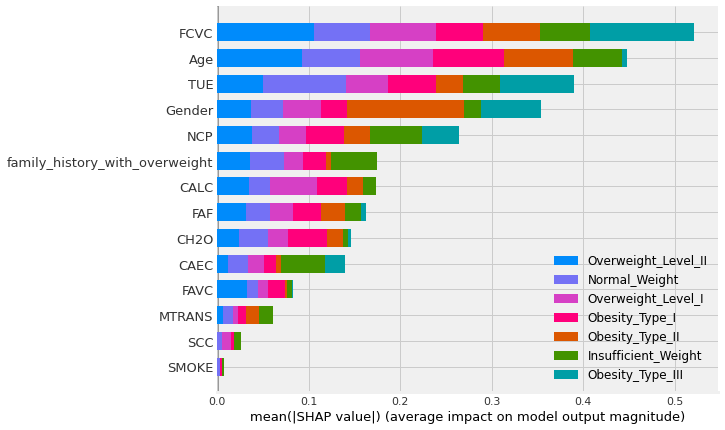

In [251]:
target_class = ['Insufficient_Weight',
                 'Normal_Weight',
                 'Obesity_Type_I',
                 'Obesity_Type_II',
                 'Obesity_Type_III',
                 'Overweight_Level_I',
                 'Overweight_Level_II']
shap.summary_plot(shap_values2, X.values, plot_type="bar", class_names=target_class, 
                 feature_names=X.columns)

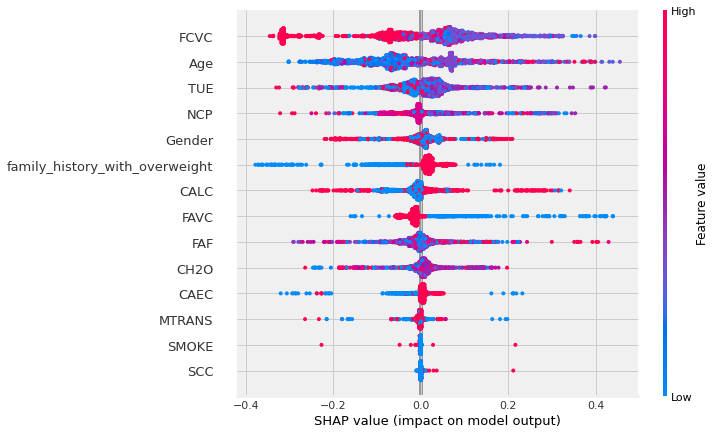

In [258]:
shap.summary_plot(shap_values2[6], X.values, class_names=target_class, 
                 feature_names=X.columns)